In [19]:
#読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
df = pd.read_csv("AOpredict_ALL.csv")

In [20]:
#学習データとテストデータの分割(7:3)
from sklearn.model_selection import train_test_split
train_X = df.drop('Result', axis=1)
train_y = df.Result
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3)

In [21]:
#ランダムフォレストモデル作成
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)

/Users/keigo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
##スコア算出
from sklearn.metrics import (roc_curve, auc, accuracy_score)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7746478873239436

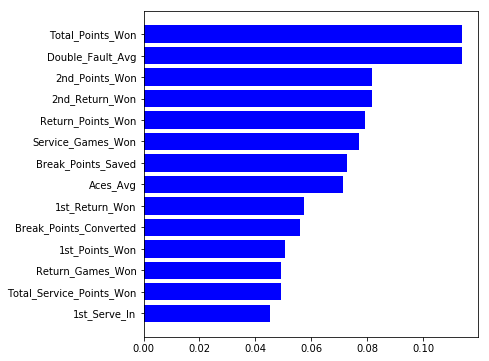

In [28]:
##良いスコアが出たので、可視化してみる
##ランダムフォレストの可視化
import matplotlib.pyplot as plt
%matplotlib inline

features = train_X.columns
importance = clf.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()